<h1> How are employees with different roles treated and affected
</h1>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 200)
df = pd.read_csv("./Data/combined2.csv")
unique_questions = df.groupby('QuestionID')['questiontext'].agg('first').reset_index()
#unique_questions


In [3]:
#Questions that are used to identify data suitability and user roles
#ID: 9. Is your employer primarily a tech organisation?
#ID: 13. Is your primary role within your company related to tech/IT?
#ID: 68. Was your employer primarily a tech tech company/organization?
#ID: 117. Which of the following best describes your work position?

questionIDs = [9,13,68,117]
# Get all the unique answers for each question ID
for questionID in questionIDs:
    unique_answers = df[df['QuestionID'] == questionID]['AnswerText'].unique()
    print(f"Question ID: {questionID}")
    print("Unique Answers:")
    for answer in unique_answers:
        print(answer)
    print()




Question ID: 9
Unique Answers:
1
0
-1

Question ID: 13
Unique Answers:
-1
1
0

Question ID: 68
Unique Answers:
0
1
-1

Question ID: 117
Unique Answers:
Back-end Developer
Front-end Developer
Supervisor/Team Lead
Executive Leadership
Dev Evangelist/Advocate
DevOps/SysAdmin
Support
Designer
One-person shop
Other
Sales
HR



Years asked: 2014, 2016, 2017, 2018, 2019


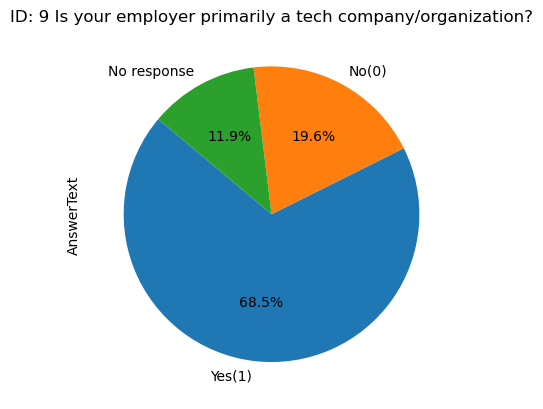

Years asked: 2016, 2017, 2018, 2019


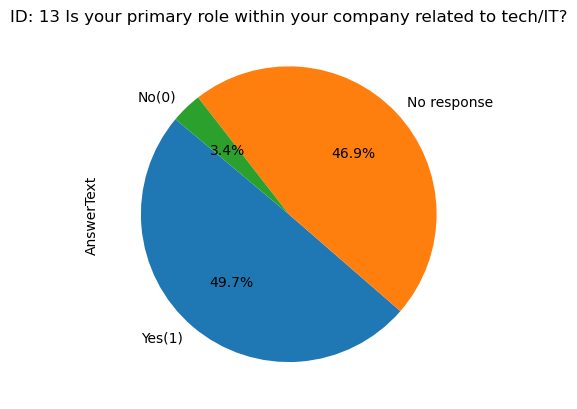

Years asked: 2017, 2018, 2019


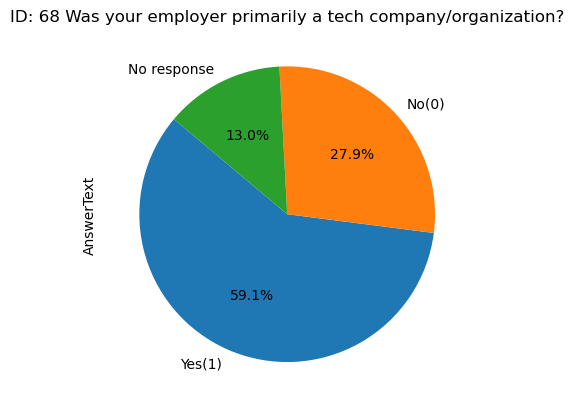

In [4]:
#Making sure data is suitable
normalization_mapping = {
    '-1': 'No response',  # Treating '-1' as "no response"
    '1': 'Yes(1)',
    '0': 'No(0)'
}

preliminary_data = [9,13,68]
for question_id in preliminary_data:
    df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)
    unique_survey_ids = df[df['QuestionID'] == question_id]['SurveyID'].unique()
    print("Years asked:", ", ".join(map(str, unique_survey_ids)))
    df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
    plt.title("ID: " + str(question_id) + " " + question_text )
    plt.show()




<h2>Notes on preliminary data</h2>
<ul>
  <li>Above 60% of user responses are from employees in a tech company.</li>
  <li>50% of user responses work primarily with tech.</li>
</ul>

In [14]:
#user roles will be generalised in the following categories
# Technical Development:
    # Back-end Developer
    # Front-end Developer
    # DevOps/SysAdmin
    
# Design and User Experience:
    # Designer
    
# Management and Leadership:
    # Supervisor/Team Lead
    # Executive Leadership
    
# Support and Operations:
    # Dev Evangelist/Advocate
    # Support
    # One-person shop (as they typically handle support and operational tasks as well)
    
# Business and Administrative:
    # Sales
    # HR
    # Other roles not directly related to product development or operations
    

unique_answers = df[df['QuestionID'] == 117]['AnswerText'].unique()

# Create dictionaries to map answers to user groups
technical_development = ['Back-end Developer', 'Front-end Developer', 'DevOps/SysAdmin']
design_and_ux = ['Designer']
management_and_leadership = ['Supervisor/Team Lead', 'Executive Leadership']
support_and_operations = ['Dev Evangelist/Advocate', 'Support', 'One-person shop']
business_and_administrative = ['Sales', 'HR']


user_groups = {
    'Technical Development': [],
    'Design and User Experience': [],
    'Management and Leadership': [],
    'Support and Operations': [],
    'Business and Administrative': []
}


for answer in unique_answers:
    if answer in technical_development:
        user_groups['Technical Development'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in design_and_ux:
        user_groups['Design and User Experience'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in management_and_leadership:
        user_groups['Management and Leadership'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in support_and_operations:
        user_groups['Support and Operations'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())
    elif answer in business_and_administrative:
        user_groups['Business and Administrative'].extend(df[(df['QuestionID'] == 117) & (df['AnswerText'] == answer)]['UserID'].tolist())


# for group, user_ids in user_groups.items():
#     print(f"{group}: {user_ids}")





<h2>Info on users</h2>
<ul>
  <li>ID: 6 Do you have a family history of mental illness?</li>
  <li>ID: 7 Have you ever sought treatment for a mental health disorder from a mental health professional?</li>
  <li>ID: 32 Have you had a mental health disorder in the past?</li>
  <li>ID: 33 Do you currently have a mental health disorder?</li>
  <li>ID: 34 Have you ever been diagnosed with a mental health disorder?</li>
  <li>ID: 78 Are you openly identified at work as a person with a mental health issue?</li>
  <li>ID: 115 If yes, what condition(s) have you been diagnosed with?</li>
</ul>



In [13]:
userInfoIds = [6, 7, 32, 33, 34, 78]

# for question_id in userInfoIds:
#     df['AnswerText'] = df['AnswerText'].replace(normalization_mapping)
#     unique_survey_ids = df[df['QuestionID'] == question_id]['SurveyID'].unique()
#     print("Years asked:", ", ".join(map(str, unique_survey_ids)))

#     df[df['QuestionID'] == question_id]['AnswerText'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
#     question_text = df[df['QuestionID'] == question_id]['questiontext'].iloc[0]
#     plt.title("ID: " + str(question_id) + " " + question_text)
#     plt.show()
    
  

In [11]:
yesanswers = df.loc[df['QuestionID'] == 33].loc[df['AnswerText'] == 'Yes']['UserID'].unique()
noanswers = df[(df['QuestionID'] == 78) & (df['AnswerText'] == 'No(0)') & (df['UserID'].isin(yesanswers))]['UserID'].unique()
percentage = (len(noanswers) / len(yesanswers)) * 100
print(str(percentage) +"% of users who answered yes to having a mental health disorder also answered no to openly idenitying as having a mental health issue at work")


40.98625707356508% of users who answered yes to having a mental health disorder also answered no to openly idenitying as having a mental health issue at work


<h2>Questions for each group</h2>


<ul>
    <li>15: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?</li>
    <li>18: Would you feel comfortable discussing a mental health issue with your coworkers?</li>
    <li>19: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?</li>
    <li>25: Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?</li>
    <li>28: Would you have been willing to discuss your mental health with your direct supervisor(s)?</li>
    <li>31: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?</li>
    <li>58: Have you ever discussed your mental health with your employer?</li>
    <li>60: Have you ever discussed your mental health with coworkers?</li>
    <li>62: Have you ever had a coworker discuss their or another coworker's mental health with you?</li>
    <li>70: Did you ever discuss your mental health with your previous employer?</li>
    <li>72: Did you ever discuss your mental health with a previous coworker(s)?</li>
    <li>74: Did you ever have a previous coworker discuss their or another coworker's mental health with you?</li>
    <li>90: Do you think that discussing a physical health issue with your employer would have negative consequences?</li>
    <li>95: Has your employer ever discussed mental health as part of an employee wellness program?</li>
    <li>98: Do you think that discussing a mental health issue with your employer would have negative consequences?</li>
    <li>99: Would you be willing to discuss a mental health issue with your coworkers?</li>
    <li>100: Would you be willing to discuss a mental health issue with your direct supervisor(s)?</li>
    <li>104: Do you think that discussing a mental health disorder with your employer would have negative consequences?</li>
    <li>108: Do you think that discussing a mental health disorder with previous employers would have negative consequences?</li>
    <li>109: Do you think that discussing a physical health issue with previous employers would have negative consequences?</li>
    <li>110: Would you have been willing to discuss a mental health issue with your previous co-workers?</li>
</ul>

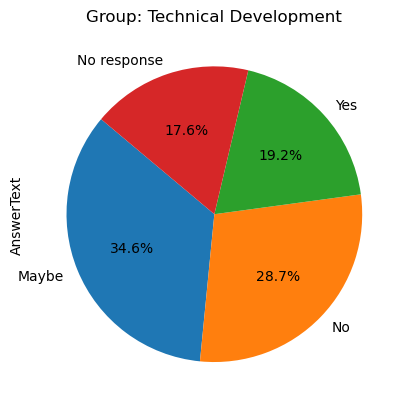

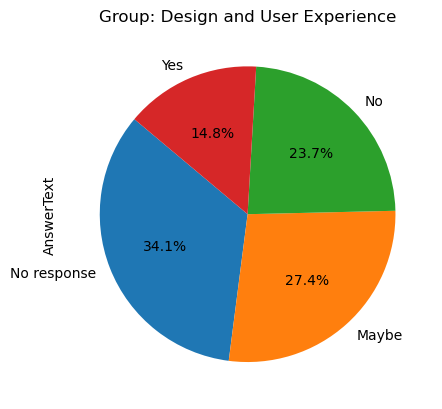

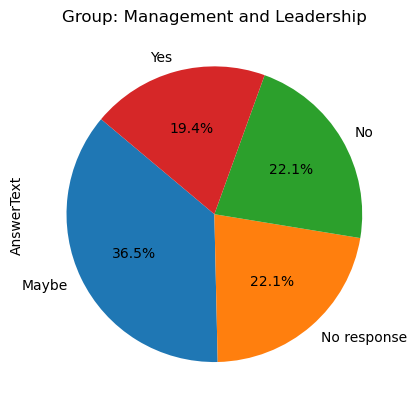

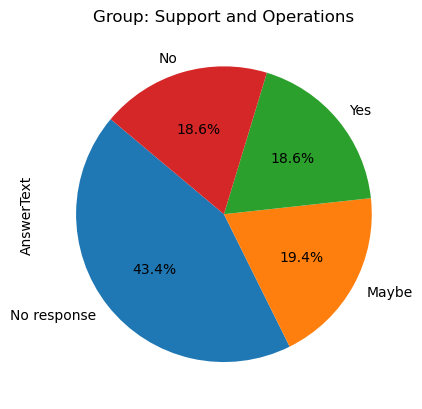

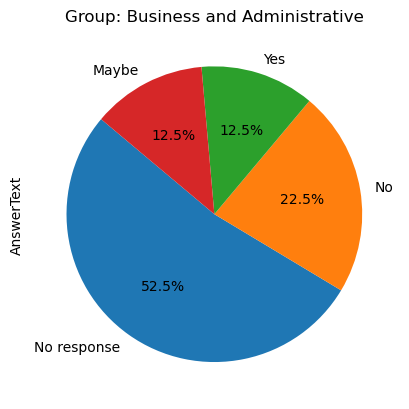

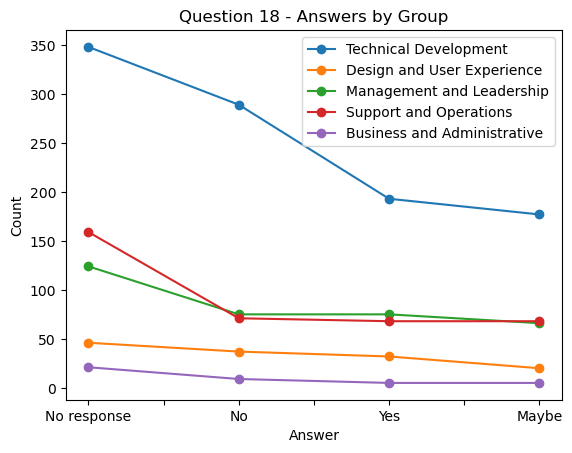

In [28]:
question_ids = [15, 18, 19, 25, 28, 31, 58, 60, 62, 70, 72, 74, 90, 95, 98, 99, 100, 104, 108, 109, 110]

import matplotlib.pyplot as plt

question_id = 18



# Get the answers for question 18
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

    # Plot the line graph for each group
    # Plot the line graph for each group

# Plot the pie chart for each group
for group, counts in group_counts.items():
    plt.figure()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title("Group: " + group)
    plt.show()

# Combine all pie charts into one line chart
plt.figure()
for group, counts in group_counts.items():
    counts.plot(kind='line', marker='o', label=group)

plt.xlabel('Answer')
plt.ylabel('Count')
plt.title("Question " + str(question_id) + " - Answers by Group")
plt.legend()
plt.show()   


<h3>18: Would you feel comfortable discussing a mental health issue with your coworkers?</h3>

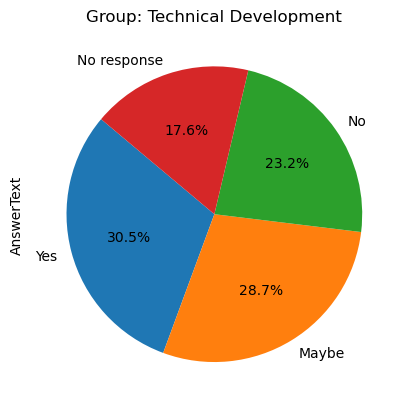

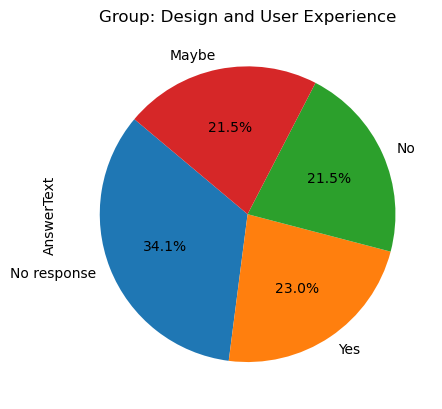

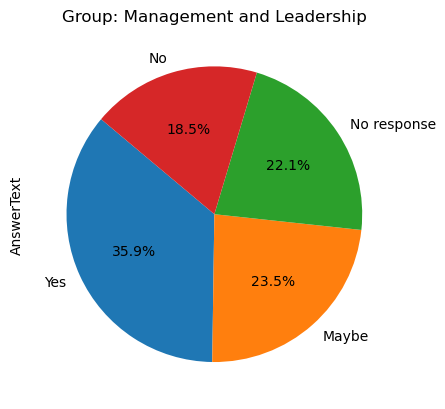

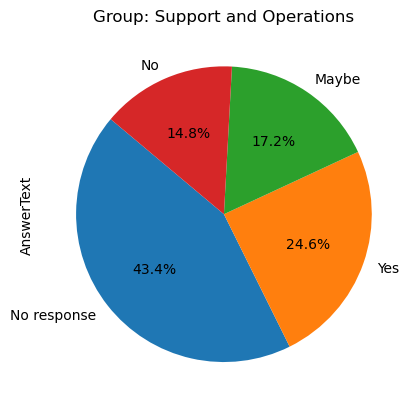

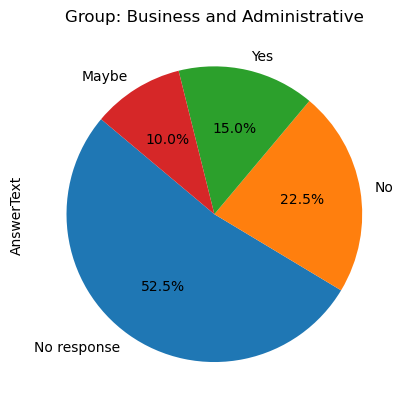

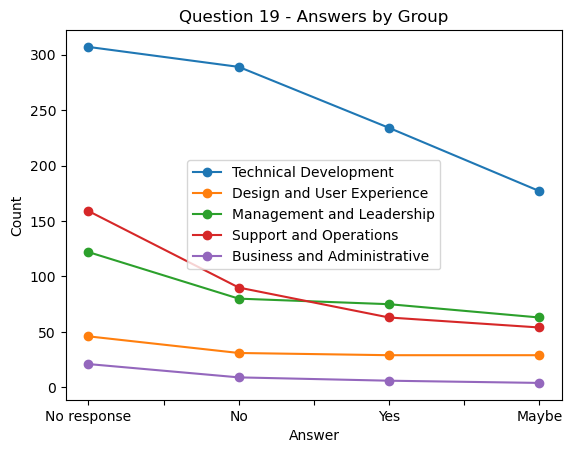

In [29]:
question_id = 19




# Get the answers for question 18
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

    # Plot the line graph for each group
    # Plot the line graph for each group

# Plot the pie chart for each group
for group, counts in group_counts.items():
    plt.figure()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title("Group: " + group)
    plt.show()

# Combine all pie charts into one line chart
plt.figure()
for group, counts in group_counts.items():
    counts.plot(kind='line', marker='o', label=group)

plt.xlabel('Answer')
plt.ylabel('Count')
plt.title("Question " + str(question_id) + " - Answers by Group")
plt.legend()
plt.show() 


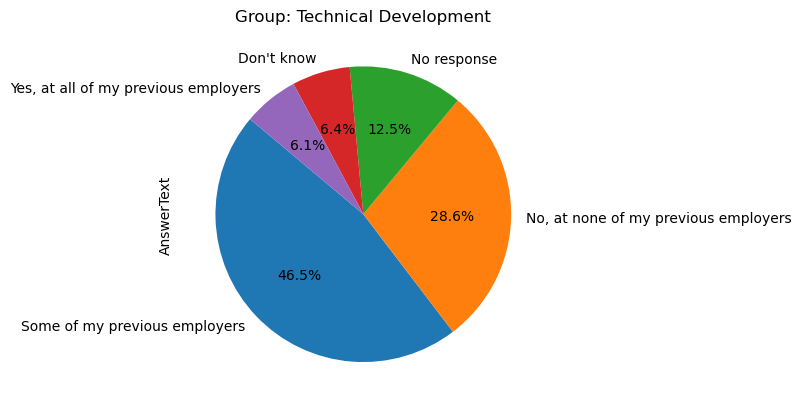

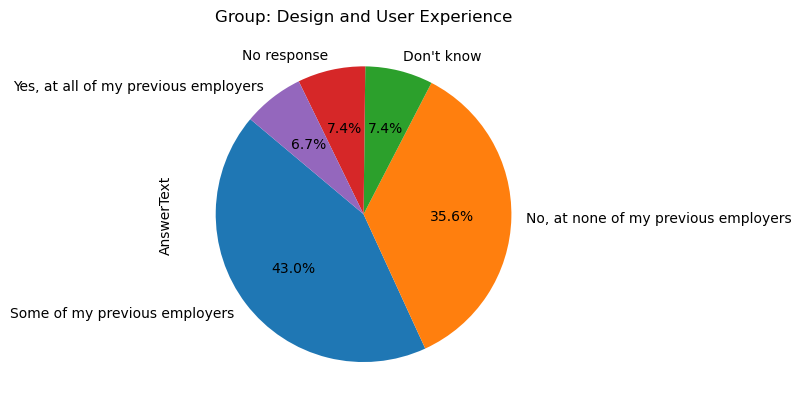

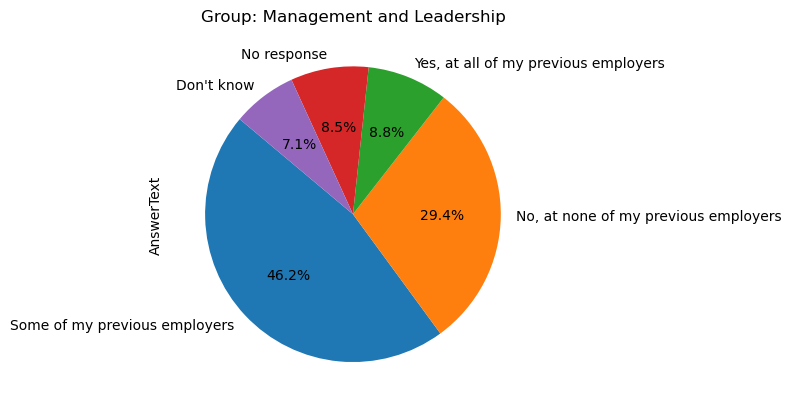

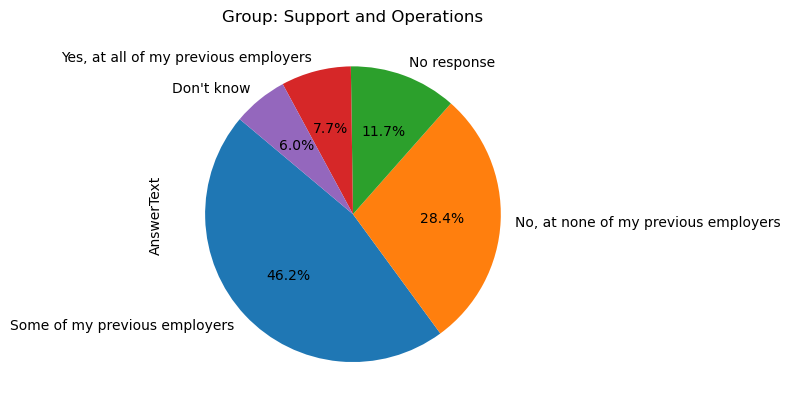

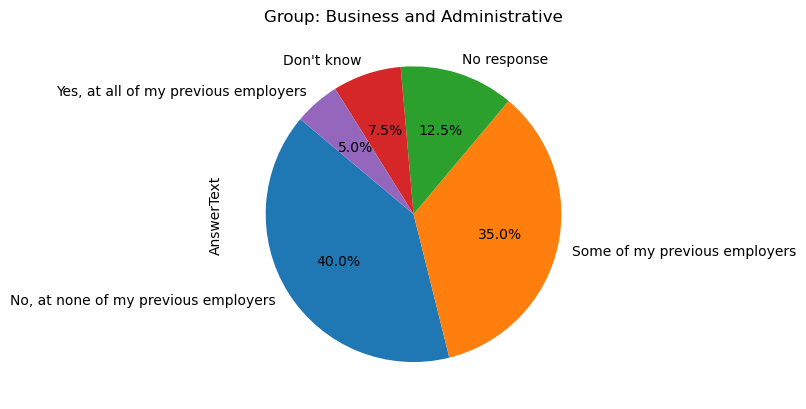

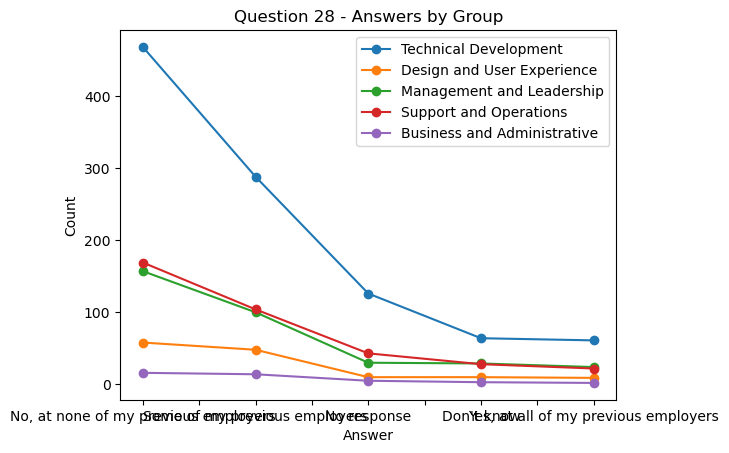

In [37]:
question_id = 28




# Get the answers for question 18
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

    # Plot the line graph for each group
    # Plot the line graph for each group

# Plot the pie chart for each group
for group, counts in group_counts.items():
    plt.figure()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title("Group: " + group)
    plt.show()

# Combine all pie charts into one line chart
plt.figure()
for group, counts in group_counts.items():
    counts.plot(kind='line', marker='o', label=group)

plt.xlabel('Answer')
plt.ylabel('Count')
plt.title("Question " + str(question_id) + " - Answers by Group")
plt.legend()
plt.show() 


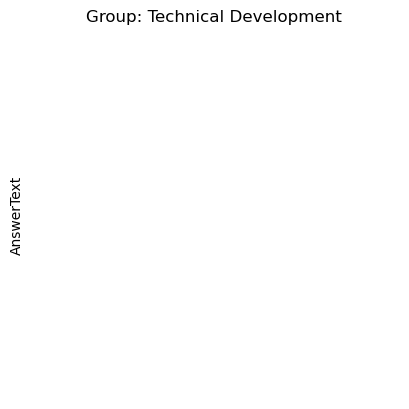

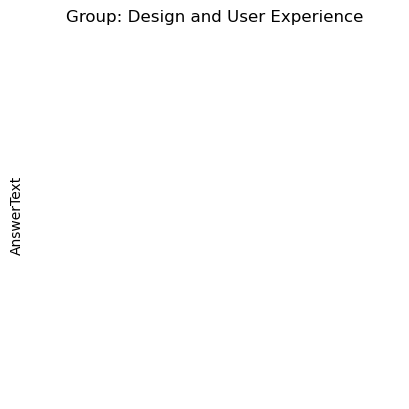

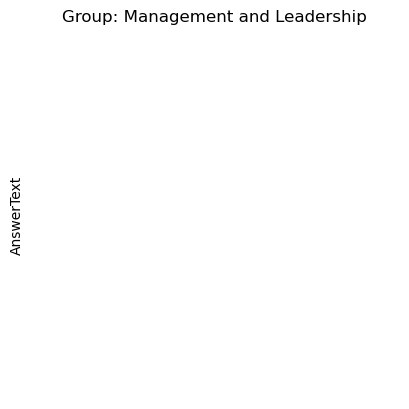

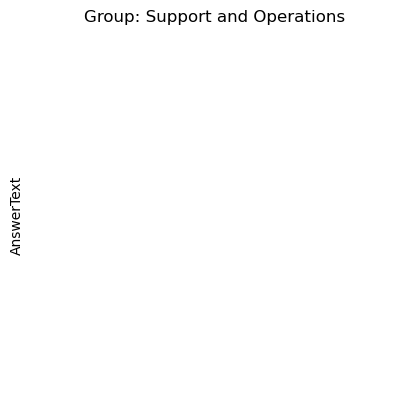

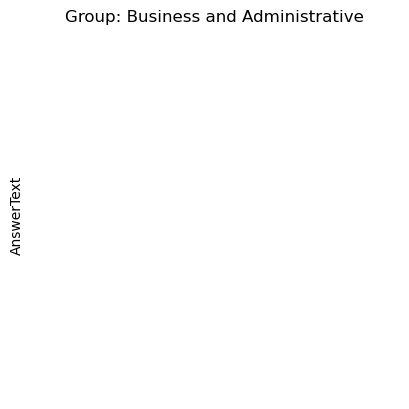

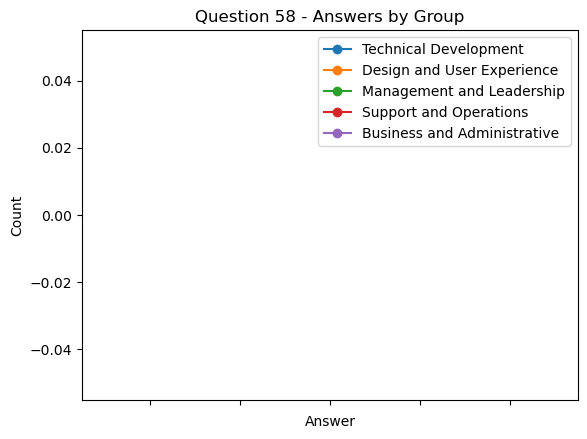

In [40]:
question_id = 60




# Get the answers for question 18
answers = df[df['QuestionID'] == question_id]

# Initialize a dictionary to store the counts for each group
group_counts = {}

# Iterate over the user groups
for group, users in user_groups.items():
    # Filter the answers for the users in the group
    group_answers = answers[answers['UserID'].isin(users)]
    # Count the unique answers for the group
    group_counts[group] = group_answers['AnswerText'].value_counts()

    # Plot the line graph for each group
    # Plot the line graph for each group

# Plot the pie chart for each group
for group, counts in group_counts.items():
    plt.figure()
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title("Group: " + group)
    plt.show()

# Combine all pie charts into one line chart
plt.figure()
for group, counts in group_counts.items():
    counts.plot(kind='line', marker='o', label=group)

plt.xlabel('Answer')
plt.ylabel('Count')
plt.title("Question " + str(question_id) + " - Answers by Group")
plt.legend()
plt.show() 